## Building a logistic regression model <br>

Working with a logistic regression model for classification has been insightful but I am wanting to understand the logistic regression model further. Here I will build a logistic regression from scratch.

### Install required modules

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Create synthetic data

Lets start with 1 dependant variable and 2 independant variables. The independant variables are continuous and sampled from a normal distrobution. The dependent variable is a discrete variable.

In [71]:
# Set random seed for reproducibility
np.random.seed(42)

x = np.random.normal(0, 10, size=1000)

p = 1 / (1 + np.exp(-0.8 * x + np.random.normal(0, 0.5, size=x.shape)))
y = (p > 0.5).astype(int)

df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,4.967142,1
1,-1.382643,0
2,6.476885,1
3,15.230299,1
4,-2.341534,0


In [72]:
df.describe()

,x,y
count,1000.000000,1000.000000
mean,0.193321,0.509000
std,9.792159,0.500169
min,-32.412673,0.000000
25%,-6.475903,0.000000
50%,0.253006,1.000000
75%,6.479439,1.000000
max,38.527315,1.000000


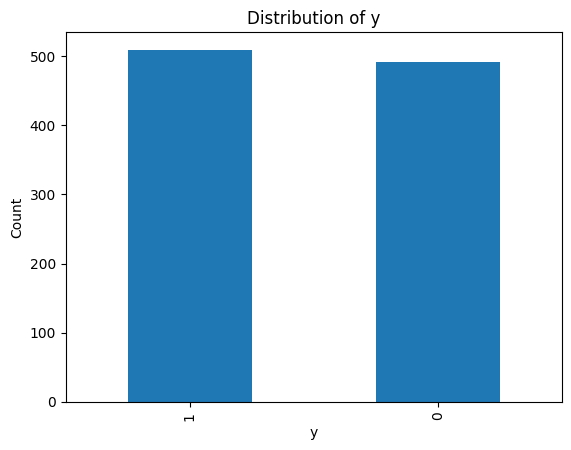

In [73]:
df['y'].value_counts().plot(kind='bar', title='Distribution of y')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

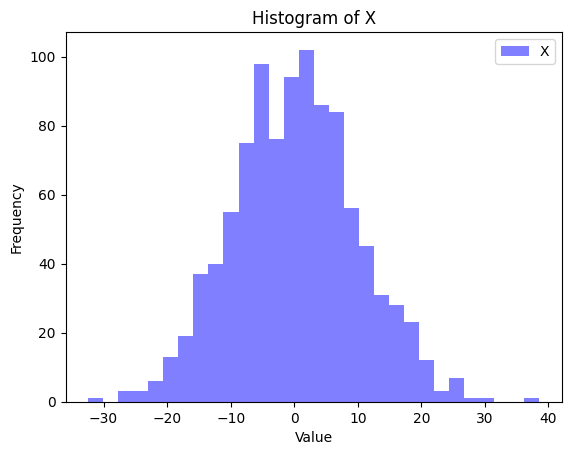

In [74]:
plt.hist(df['x'], bins=30, alpha=0.5, label='X', color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.legend()
plt.show()


### Logistic Regression Maths

Logistic regression models the probability of the dependant variable 𝑦 belonging to class 1 (instead of class 0).

This can be written as: <br/>
<br/>
$$
Pr(𝑦 = 1|x) 
$$
<br/>
Where y = the dependant variable and x = the independant variable. <br/>

To model the relationship between $p(X) = Pr(𝑦 = 1|x)$ and $X$, where $X={x1,x2,...,xn}$ , we can use the logistic regression model: <br/>
<br/>
$$
p(X) = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}
$$



Which we can rearrage as:<br/>
<br/>
$$
log\left(\frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1 x
$$
<br/>


The left-hand side is known as the log odds, and is linear with X. With a logistic regression model an increase in X by one unit changed the log odds by $\beta_1$, or its changes the odds (probability) by $e^{\beta_1}$.

To estimate the coefficients $\beta_0$ and $\beta_1$, we use the maximum likelihood method to fit the logistic regression model. WE try and find the values of $\beta_0$ and $\beta_1$ that when plugged into the model logistic regression model, would yield a number close to one for class 1 and a number close to 0 for class 0. The maximum likelihood function is as as follows:
$$ ℓ(β₀, β₁) = ∏_{i : y_i=1} p(x_i) ∏_{i' : y_{i'}=0} (1 - p(x_{i'})) $$
The estimates of $\beta_0$ and $\beta_1$ are chosen to maximise this function.

We can derive the log-likelihood function, which simplifies computations:
$$ℓ(β₀, β₁) = ∑_{i=1}^{n} \left[ y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i)) \right]$$


To maximise the log-likelihood function, we compute it's gradient:
$$∂ℓ/∂β = ∑_{i=1}^{n} (y_i - p(x_i)) x_i$$
This gradient is used in gradient ascent to update $\beta_0$ and $\beta_1$.
